$$\require{mhchem}$$       

# Homework 10
## Pengfei Cheng
## AndrewID: pengfeic

# Transient CSTR

Consider a transient CSTR with the following kinetics:
\begin{align*}
\ce{A->[k]B}
\end{align*}
There is an inlet feed at temperature $T_0$, with a concentration $C_{A,0}$.
The various parameters are

| Parameter        | Value  $\quad\quad\quad$          | Units    |
|----------------|------------------|----------|
| $T_0$        | 298              | K        |
| $T_m$        | 298              | K        |
| $\hat{C}_p$    | 4.0              | kJ/kg K  |
| $C_{A,0}$       | 2.0              | kmol/m$^3$ |
| $k_m \: (T_m)$     | 0.004            | 1/min    |
| E            | $1.5 \times 10^4$ | K        |
| $\rho$       | $10^3$           | kg/m$^3$   |
| $\Delta H_R$ | $-2.2 \times 10^5$  | kJ/kmol  |
| U | 340 | kJ/min/K|

You can assume a reactor size of 1 m$^3$. The residence time ($\tau$) is 30 min, and from that the volumetric feed rate can be calculated ($\nu=V/\tau$). Heat is transferred to the reactor with a cooling jacket with heat transfer coefficient $U$ and a set point of $T_{set}=298$ K.

## Part A
Calculate the concentration and temperature profile for the first 500 minutes.

In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

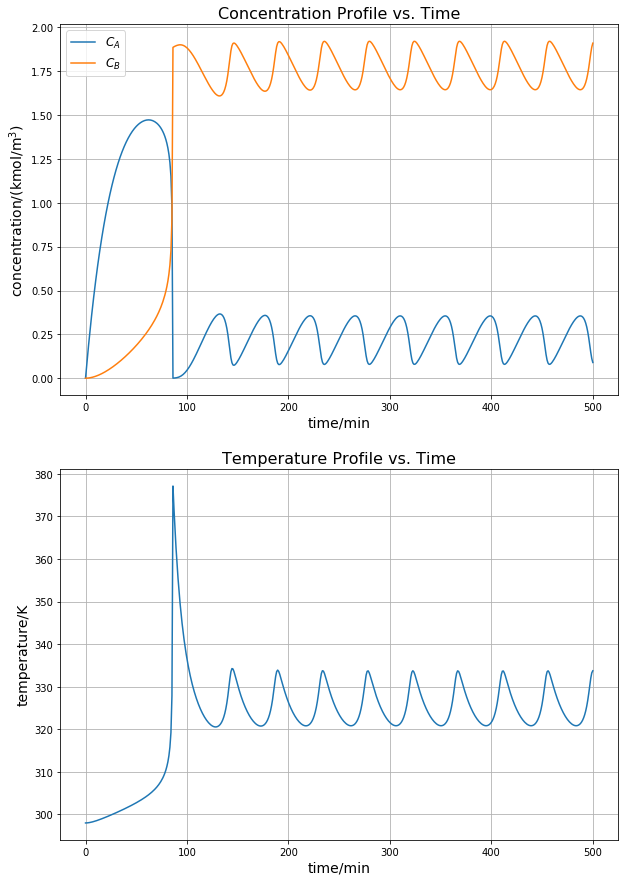

In [9]:
# input parameters

T0 = 298           # K
Tm = 298           # K
Tset = 298         # K
E = 1.5e4          # K, = E'/R

km = 0.004         # 1/min
rho = 1e3          # kg/m^3
Cp_hat = 4.0       # kJ/kg/K
Cp = Cp_hat * rho  # kJ/m^3/K, volume-specific heat capacity
DeltaH_R = -2.2e5  # kJ/kmol
U = 340            # kJ/min/K

CAfeed = 2.0       # kmol/m^3
CB0 = 0
V = 1              # m^3
tau = 30           # min
nu = V / tau       # m^3/min
FA0 = CAfeed * nu  # kmol/min
FB0 = 0



# define ODE functions

def CSTR_1 (Y, t):
    CA, CB, T = Y
    
    k = km * np.exp(- E * (1/T - 1/Tset))    # 1/min
    
    r = k * CA                             # kmol/m^3/min
    
    Q_dot = U * (Tset - T)                 # kJ/min
    
    dCAdt = FA0 / V - nu * CA / V - r
    dCBdt = FB0 / V - nu * CB / V + r
    dTdt = (nu * Cp * (T0 - T) - DeltaH_R * r * V + Q_dot) / (Cp * V)   # (kJ/min) / (kJ/m^3/K * m^3) = K/min
    
    return [dCAdt, dCBdt, dTdt]



# do the integration

tspan = np.linspace(0, 500, 500)

Y0 = [0, 0, T0]

sol = odeint(CSTR_1, Y0, tspan)

CA = sol [:, 0]
CB = sol [:, 1]
T = sol [:, 2]



# plot the profile

plt.figure(figsize=(10,15))

plt.subplot(2, 1, 1)
plt.grid()
plt.plot(tspan, CA, tspan, CB)
plt.xlabel('time/min', fontsize = 14)
plt.ylabel('concentration/(kmol/$\mathrm{m}^3$)', fontsize = 14)
plt.legend(['$C_A$', '$C_B$'], fontsize = 12)
plt.title('Concentration Profile vs. Time', fontsize = 16)

plt.subplot(2, 1, 2)
plt.grid()
plt.plot(tspan, T)
plt.xlabel('time/min', fontsize = 14)
plt.ylabel('temperature/K', fontsize = 14)
plt.title('Temperature Profile vs. Time', fontsize = 16)

plt.show()

## Part B
Calculate a steady state solution for $C_{A,0}$ and temperature, T.

In [10]:
# define steady state functions

def CSTR_2 (Y):
    CA, CB, T = Y
    
    k = km * np.exp(- E * (1/T - 1/T0))    # 1/min
    
    r = k * CA                             # kmol/m^3/min
    
    Q_dot = U * (Tset - T)                 # kJ/min
    
    dCAdt = FA0 / V- nu * CA / V - r
    dCBdt = FB0 / V- nu * CB / V + r
    dTdt = (nu * Cp * (T0 - T) - DeltaH_R * r * V + Q_dot) / (Cp * V)   # (kJ/min) / (kJ/m^3/K * m^3) = K/min
    
    return [dCAdt, dCBdt, dTdt]



# solve the nonlinear equations
Y0 = [0, 2, 330]
sol_2 = fsolve(CSTR_2, Y0)

print('At the steady state, CA = {:1.3f} kmol/m^3, CB = {:1.3f} kmol/m^3, T = {:3.2f} K.'.format(sol_2[0], sol_2[1], sol_2[2]))

At the steady state, CA = 0.203 kmol/m^3, CB = 1.797 kmol/m^3, T = 325.84 K.


## Part C
Assume that operation starts with the concentration of species A ($C_A$) and temperature (T) at the steady-state values you calculated above. Plot $C_A$ and T for the first 1000 minutes.

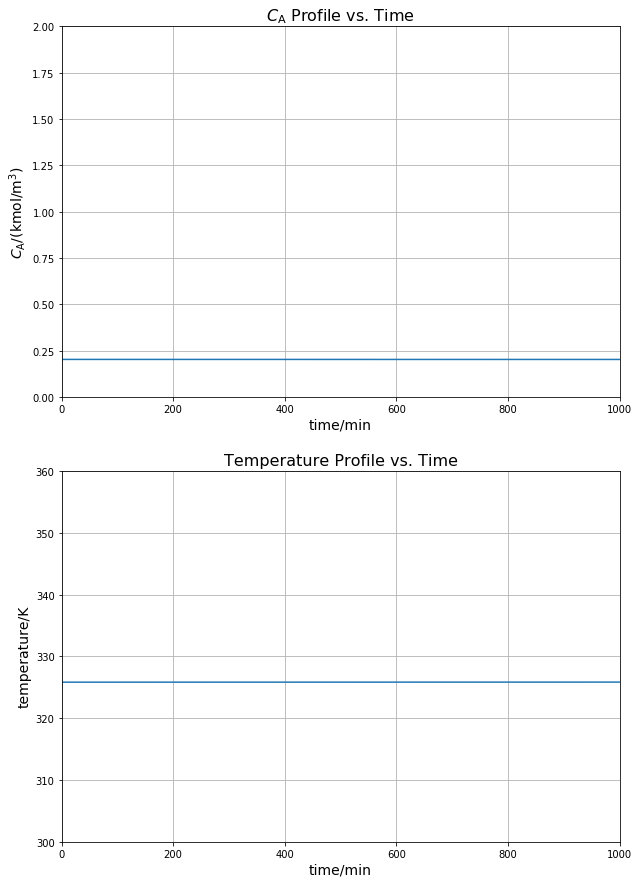

In [14]:
# update initial conditions

Y0_3 = list(sol_2)
Y0_3[1] = 0 # CB0 = 0, although it would not affect the system



# do the integration

tspan = np.linspace(0, 1000, 500)

sol_3 = odeint(CSTR_1, Y0_3, tspan)

CA = sol_3 [:, 0]
CB = sol_3 [:, 1]
T = sol_3 [:, 2]



# plot the profile

plt.figure(figsize=(10,15))

plt.subplot(2, 1, 1)
plt.grid()
plt.plot(tspan, CA)
plt.xlabel('time/min', fontsize = 14)
plt.ylabel('$C_\mathrm{A}$/(kmol/$\mathrm{m}^3$)', fontsize = 14)
plt.title('$C_\mathrm{A}$ Profile vs. Time', fontsize = 16)
plt.xlim(0, 1000)
plt.ylim(0, 2)

plt.subplot(2, 1, 2)
plt.grid()
plt.plot(tspan, T)
plt.xlabel('time/min', fontsize = 14)
plt.ylabel('temperature/K', fontsize = 14)
plt.title('Temperature Profile vs. Time', fontsize = 16)
plt.xlim(0, 1000)
plt.ylim(300, 360)

plt.show()

## Part D
Now plot $C_A$ and T again, but perturb\* the initial concentration of A by +0.001 M, and perturb\* the initial temperature by +0.001 K. Do you think that it would be feasible to maintain the process at the steady-state conditions you found above? Why or why not?

*In this case, "perturb" means to simply change the value by a small amount

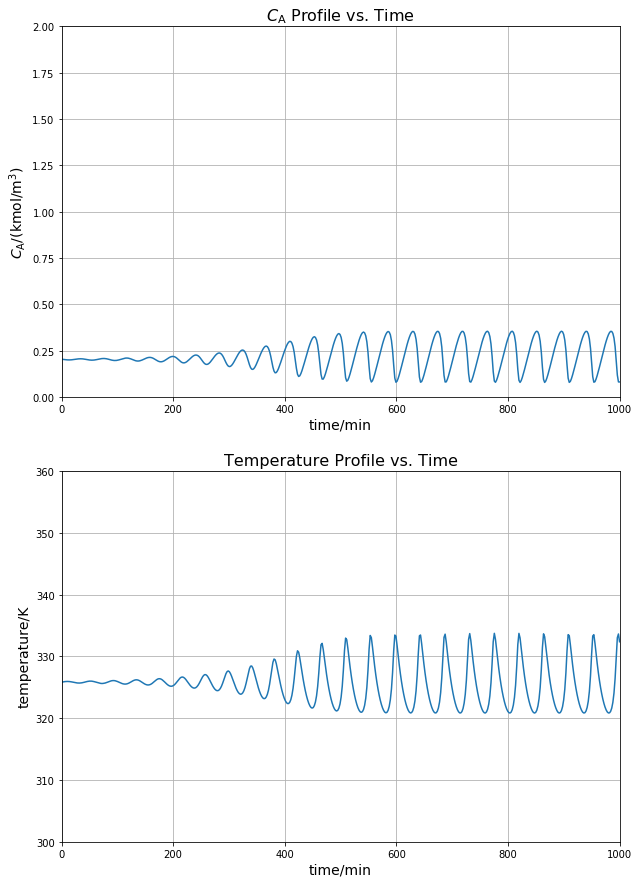

In [13]:
# perturb the initial conditions

Y0_4 = list(Y0_3)
Y0_4[1] = 0
Y0_4[0] += 0.001
Y0_4[2] += 0.001


# do the integration

sol_4 = odeint(CSTR_1, Y0_4, tspan)

CA = sol_4 [:, 0]
CB = sol_4 [:, 1]
T = sol_4 [:, 2]



# plot the profile

plt.figure(figsize=(10,15))

plt.subplot(2, 1, 1)
plt.grid()
plt.plot(tspan, CA)
plt.xlabel('time/min', fontsize = 14)
plt.ylabel('$C_\mathrm{A}$/(kmol/$\mathrm{m}^3$)', fontsize = 14)
plt.title('$C_\mathrm{A}$ Profile vs. Time', fontsize = 16)
plt.xlim(0, 1000)
plt.ylim(0, 2)

plt.subplot(2, 1, 2)
plt.grid()
plt.plot(tspan, T)
plt.xlabel('time/min', fontsize = 14)
plt.ylabel('temperature/K', fontsize = 14)
plt.title('Temperature Profile vs. Time', fontsize = 16)
plt.xlim(0, 1000)
plt.ylim(300, 360)

plt.show()

It would not be feasible that the steady state maintains as initial conditions (ICs) are perturbed, because this is not a stable steady state.

# Bonus
Vary the residence time from 5 to 30 and identify the residence time at which the steady state becomes stable (to the nearest minute).

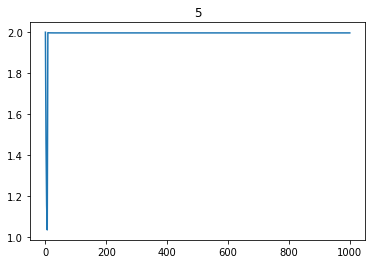

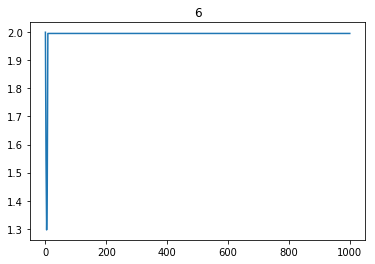

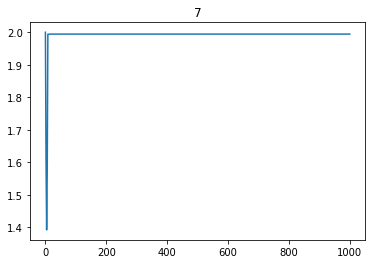

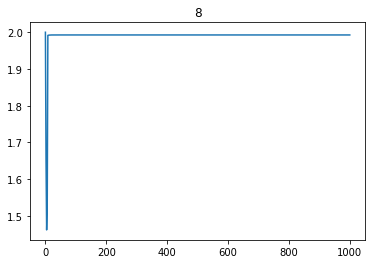

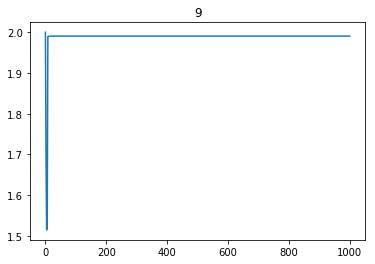

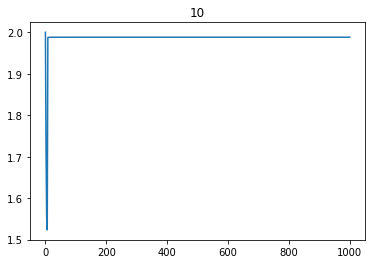

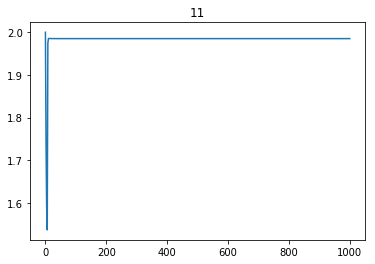

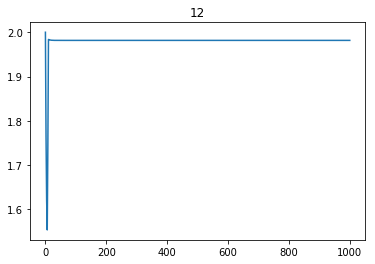

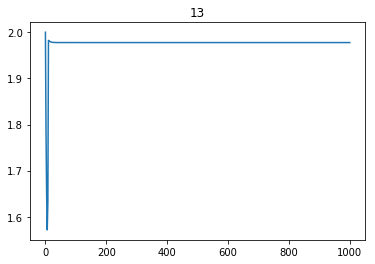

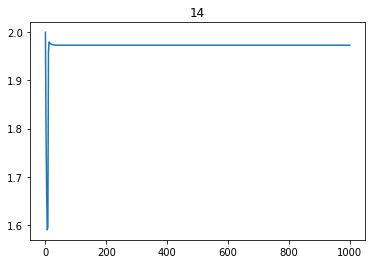

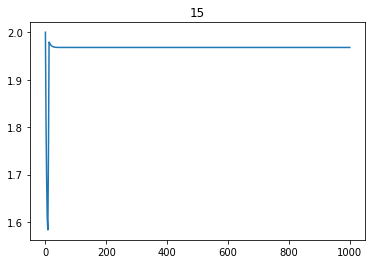

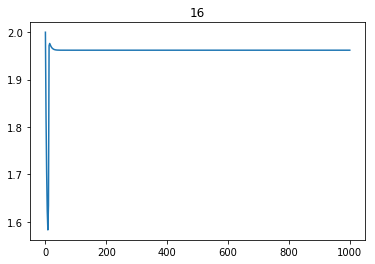

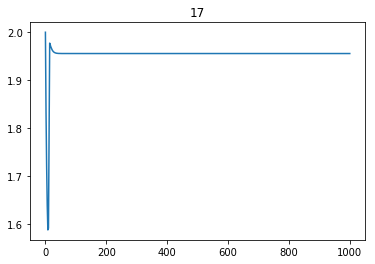

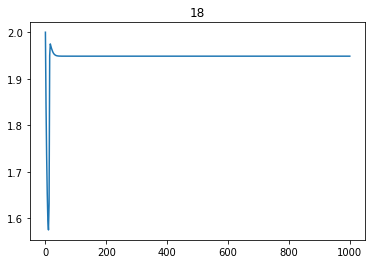

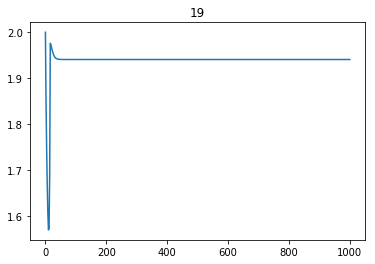

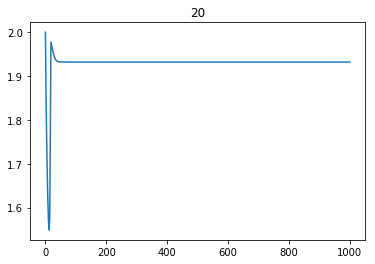

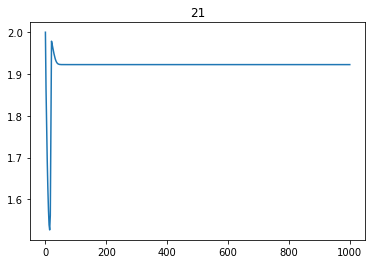

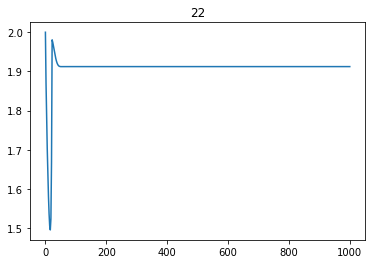

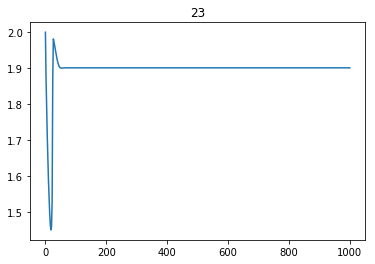

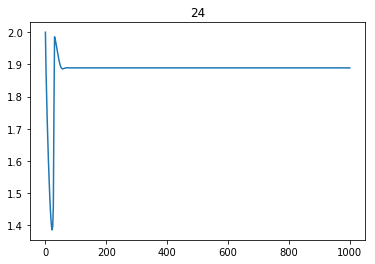

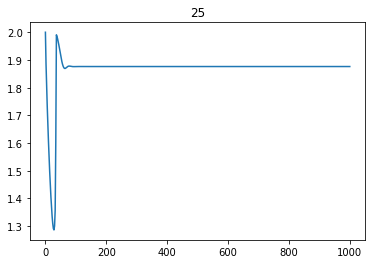

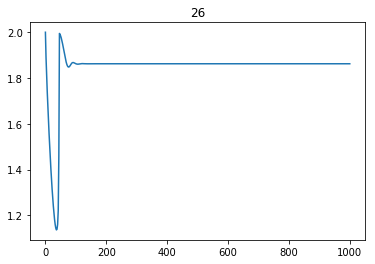

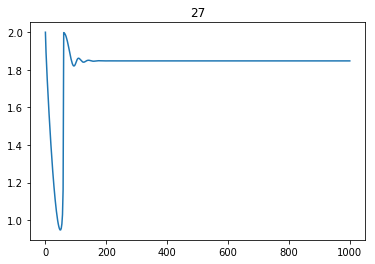

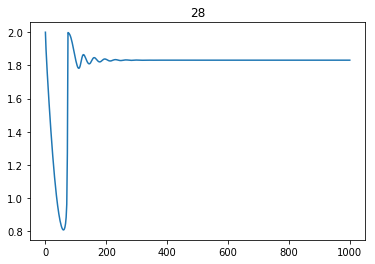

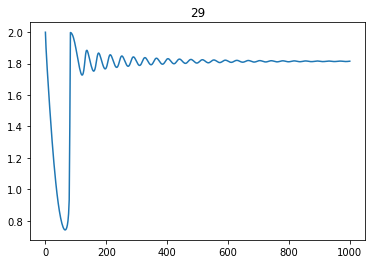

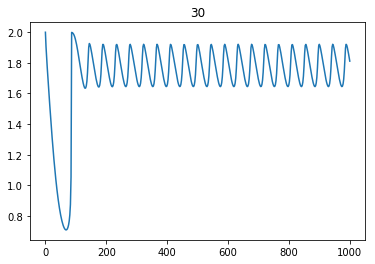

In [6]:
def CSTR_3 (Y, t, tau):
    
    CA, CB, T = Y
    
    nu = V / tau
    FA0 = nu * CAfeed
    
    k = km * np.exp(- E * (1/T - 1/Tset))    # 1/min
    
    r = k * CA                             # kmol/m^3/min
    
    Q_dot = U * (Tset - T)                 # kJ/min
    
    dCAdt = FA0 / V - nu * CA / V - r
    dCBdt = FB0 / V - nu * CB / V + r
    dTdt = (nu * Cp * (T0 - T) - DeltaH_R * r * V + Q_dot) / (Cp * V)   # (kJ/min) / (kJ/m^3/K * m^3) = K/min
    
    return [dCAdt, dCBdt, dTdt]

tauspan = np.linspace(5, 30, 26)

for i, tau in enumerate(tauspan):
    sol_tmp = odeint(CSTR_3, Y0, tspan, args = (tau,))
    plt.plot(tspan, sol_tmp[:, 1])
    plt.title(str(i + 5))
    plt.show()

From the figures above, the steady state would be stable from $\tau$ equals 5 to 22 min.

For $\tau = 10$ min,

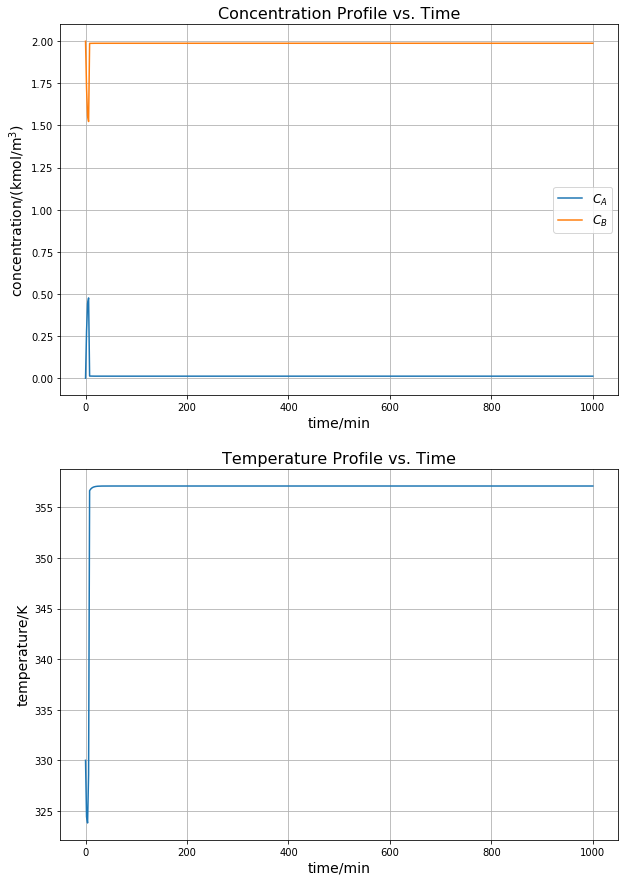

In [7]:
# do the integration

sol_bonus = odeint(CSTR_3, Y0, tspan, args = (10,))

CA = sol_bonus[:, 0]
CB = sol_bonus[:, 1]
T = sol_bonus[:, 2]



# plot the profile

plt.figure(figsize=(10,15))

plt.subplot(2, 1, 1)
plt.grid()
plt.plot(tspan, CA, tspan, CB)
plt.xlabel('time/min', fontsize = 14)
plt.ylabel('concentration/(kmol/$\mathrm{m}^3$)', fontsize = 14)
plt.legend(['$C_A$', '$C_B$'], fontsize = 12)
plt.title('Concentration Profile vs. Time', fontsize = 16)

plt.subplot(2, 1, 2)
plt.grid()
plt.plot(tspan, T)
plt.xlabel('time/min', fontsize = 14)
plt.ylabel('temperature/K', fontsize = 14)
plt.title('Temperature Profile vs. Time', fontsize = 16)

plt.show()